metric  ==>  ['classical', 'CMbasedMetric', 'EventBasedMetric', 'event_confusion_matrix', 'metric_abstract', 'MyMetric']
general  ==>  ['confusion_matrix_pretty_print', 'dataset_viewer', 'libimport', 'libinstall', 'utils', 'visualization']


W0125 18:57:27.605882  1320 deprecation_wrapper.py:119] From c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\tfplot\figure.py:18: The name tf.Summary is deprecated. Please use tf.compat.v1.Summary instead.

c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Libraries loaded successfully.
Utils loaded successfully!!


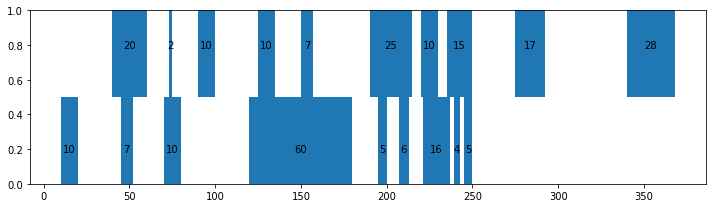

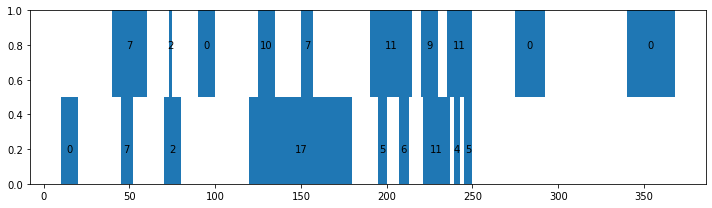

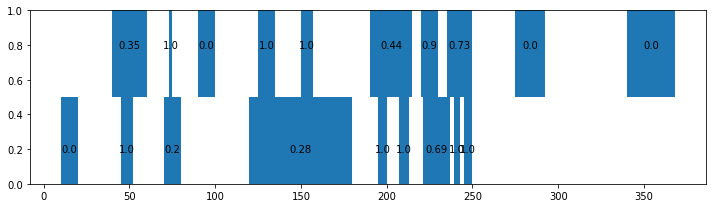

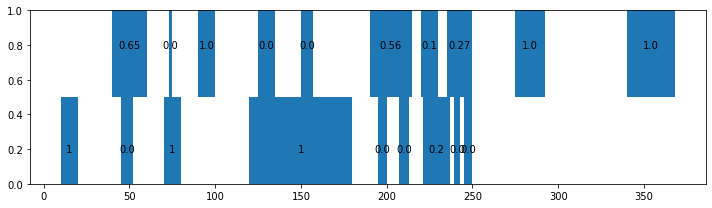

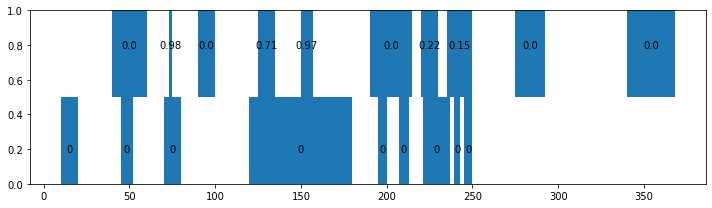

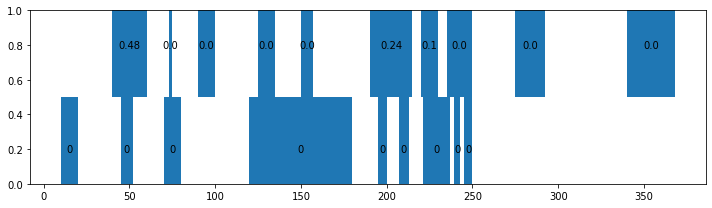

           existance     length  overlap_rate  positional  cardinality
tp          7.000000  57.000000      5.423333    3.145203     4.000000
fp          1.000000  66.000000      3.200000    4.037464     5.000000
fn          3.000000  87.000000      4.576667    3.817333     6.000000
recall      0.700000   0.395833      0.542333    0.451732     0.400000
precision   0.875000   0.463415      0.628914    0.437888     0.444444
f1          0.777778   0.426966      0.582423    0.444702     0.421053


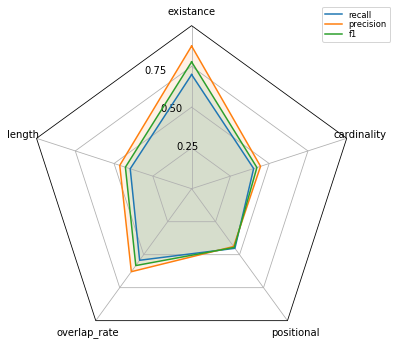

{'existance': {'tp': 7, 'fp': 1, 'fn': 3, 'recall': 0.7, 'precision': 0.875, 'f1': 0.7777777777777777}, 'length': {'tp': 57, 'fp': 66, 'fn': 87, 'recall': 0.3958333333333333, 'precision': 0.4634146341463415, 'f1': 0.42696629213483145}, 'overlap_rate': {'tp': 5.423333333333334, 'fp': 3.1999999920000004, 'fn': 4.576666666666666, 'recall': 0.5423333333333333, 'precision': 0.6289138003515242, 'f1': 0.5824234833359256}, 'positional': {'tp': 3.1452031208584397, 'fp': 4.037463815394261, 'fn': 3.8173330637472986, 'recall': 0.4517323913967623, 'precision': 0.4378879250245921, 'f1': 0.4447024329004566}, 'cardinality': {'tp': 4, 'fp': 5.0, 'fn': 6.0, 'recall': 0.4, 'precision': 0.4444444444444444, 'f1': 0.4210526315789474}}
Detailed segment results (length or frame count):
	true positive segments:		57
	true negative segments:		156
	insertion segments:			10
	deletion segments:			55
	fragmenting segments:		11
	merge segments:				20
	start overfill segments:	8
	end overfill segments:		28
	start unde

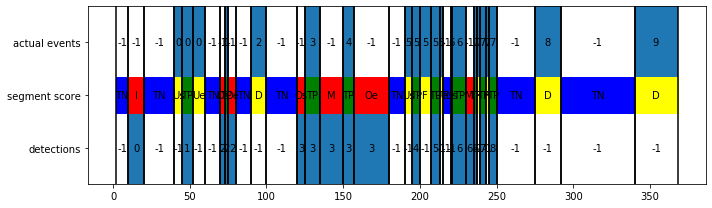

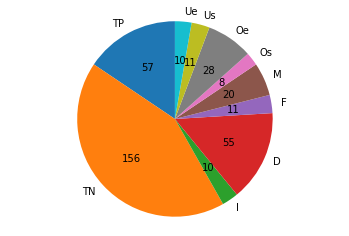

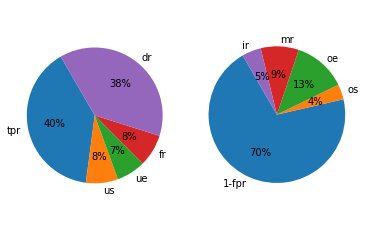

Standard event results:
	precision:	0.8888888888888888	Weighted by length:	0.9186991869918699
	recall:		0.7	Weighted by length:	0.6180555555555556
Detailed event results:
	Actual events:
		deletions:			3	30.00% of actual events
		merged:				3	30.00% of actual events
		fragmented:			1	10.00% of actual events
		frag. and merged:	1	10.00% of actual events
		correct:			2	20.00% of actual events
	Detected events:
		insertions:			1	11.11% of detected events
		merging:			1	11.11% of detected events
		fragmenting:		4	44.44% of detected events
		frag. and merging:	1	11.11% of detected events
		correct:			2	22.22% of detected events
[0.8888888888888888, 0.7, 0.9186991869918699, 0.6180555555555556]
[0.8888888888888888, 0.7, 0.9186991869918699, 0.6180555555555556]
(0.8888888888888888;0.7;0.9186991869918699;0.6180555555555556)

[2, 3, 3, 1, 1, 4, 1, 1, 1, 10, 9]
[2, 3, 3, 1, 1, 4, 1, 1, 1, 10, 9]
(2;3;3;1;1;4;1;1;1;10;9)



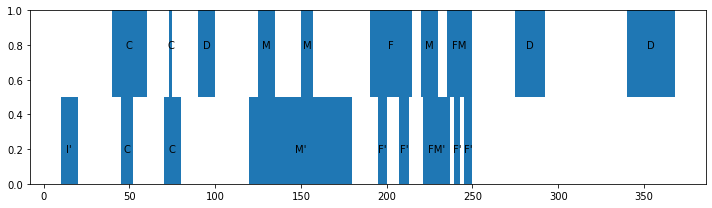

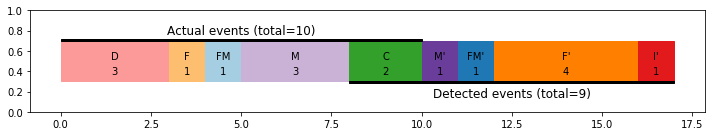

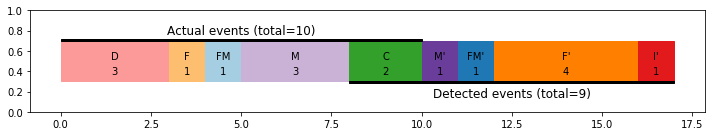

In [1]:
%matplotlib inline
from wardmetrics.core_methods import eval_events, eval_segments
from wardmetrics.utils import *
from wardmetrics.visualisations import *

from metric.MyMetric import testMyMetric


ground_truth_test = [
    (40, 60),
    (73, 75),
    (90, 100),
    (125, 135),
    (150, 157),
    (190, 215),
    (220, 230),
    (235, 250),
    (275, 292),
    (340, 368),
    
    
]

detection_test = [
    (10, 20),
    (45, 52),
    (70, 80),
    (120, 180),
    (195, 200),
    (207, 213),
    (221, 237),
    (239, 243),
    (245, 250),
]
testMyMetric(ground_truth_test,detection_test)
eval_start = 2
eval_end = 241

# Calculate segment results:
twoset_results, segments_with_scores, segment_counts, normed_segment_counts = eval_segments(ground_truth_test, detection_test, eval_start, eval_end)

# Print results:
print_detailed_segment_results(segment_counts)
print_detailed_segment_results(normed_segment_counts)
print_twoset_segment_metrics(twoset_results)

# Access segment results in other formats:
print("\nAbsolute values:")
print("----------------")
print(detailed_segment_results_to_list(segment_counts)) # segment scores as basic python list
print(detailed_segment_results_to_string(segment_counts)) # segment scores as string line
print(detailed_segment_results_to_string(segment_counts, separator=";", prefix="(", suffix=")\n")) # segment scores as string line

print("Normed values:")
print("--------------")
print(detailed_segment_results_to_list(normed_segment_counts)) # segment scores as basic python list
print(detailed_segment_results_to_string(normed_segment_counts)) # segment scores as string line
print(detailed_segment_results_to_string(normed_segment_counts, separator=";", prefix="(", suffix=")\n")) # segment scores as string line

# Access segment metrics in other formats:
print("2SET metrics:")
print("-------------")
print(twoset_segment_metrics_to_list(twoset_results)) # twoset_results as basic python list
print(twoset_segment_metrics_to_string(twoset_results)) # twoset_results as string line
print(twoset_segment_metrics_to_string(twoset_results, separator=";", prefix="(", suffix=")\n")) # twoset_results as string line

# Visualisations:
plot_events_with_segment_scores(segments_with_scores, ground_truth_test, detection_test)
plot_segment_counts(segment_counts)
plot_twoset_metrics(twoset_results)


# Run event-based evaluation:
gt_event_scores, det_event_scores, detailed_scores, standard_scores = eval_events(ground_truth_test, detection_test)

# Print results:
print_standard_event_metrics(standard_scores)
print_detailed_event_metrics(detailed_scores)

# Access results in other formats:
print(standard_event_metrics_to_list(standard_scores)) # standard scores as basic python list, order: p, r, p_w, r_w
print(standard_event_metrics_to_string(standard_scores)) # standard scores as string line, order: p, r, p_w, r_w)
print(standard_event_metrics_to_string(standard_scores, separator=";", prefix="(", suffix=")\n")) # standard scores as string line, order: p, r, p_w, r_w

print(detailed_event_metrics_to_list(detailed_scores)) # detailed scores as basic python list
print(detailed_event_metrics_to_string(detailed_scores)) # detailed scores as string line
print(detailed_event_metrics_to_string(detailed_scores, separator=";", prefix="(", suffix=")\n")) # standard scores as string line


# Show results:
plot_events_with_event_scores(gt_event_scores, det_event_scores, ground_truth_test, detection_test, show=False)
plot_event_analysis_diagram(detailed_scores)


In [5]:
import pandas as pd
a=pd.to_datetime('2-1-20')
b=pd.to_datetime('3-1-20')
pd.to_datetime(b-a)

TypeError: <class 'pandas._libs.tslibs.timedeltas.Timedelta'> is not convertible to datetime